In [1]:
from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import plot_histogram
import numpy as np

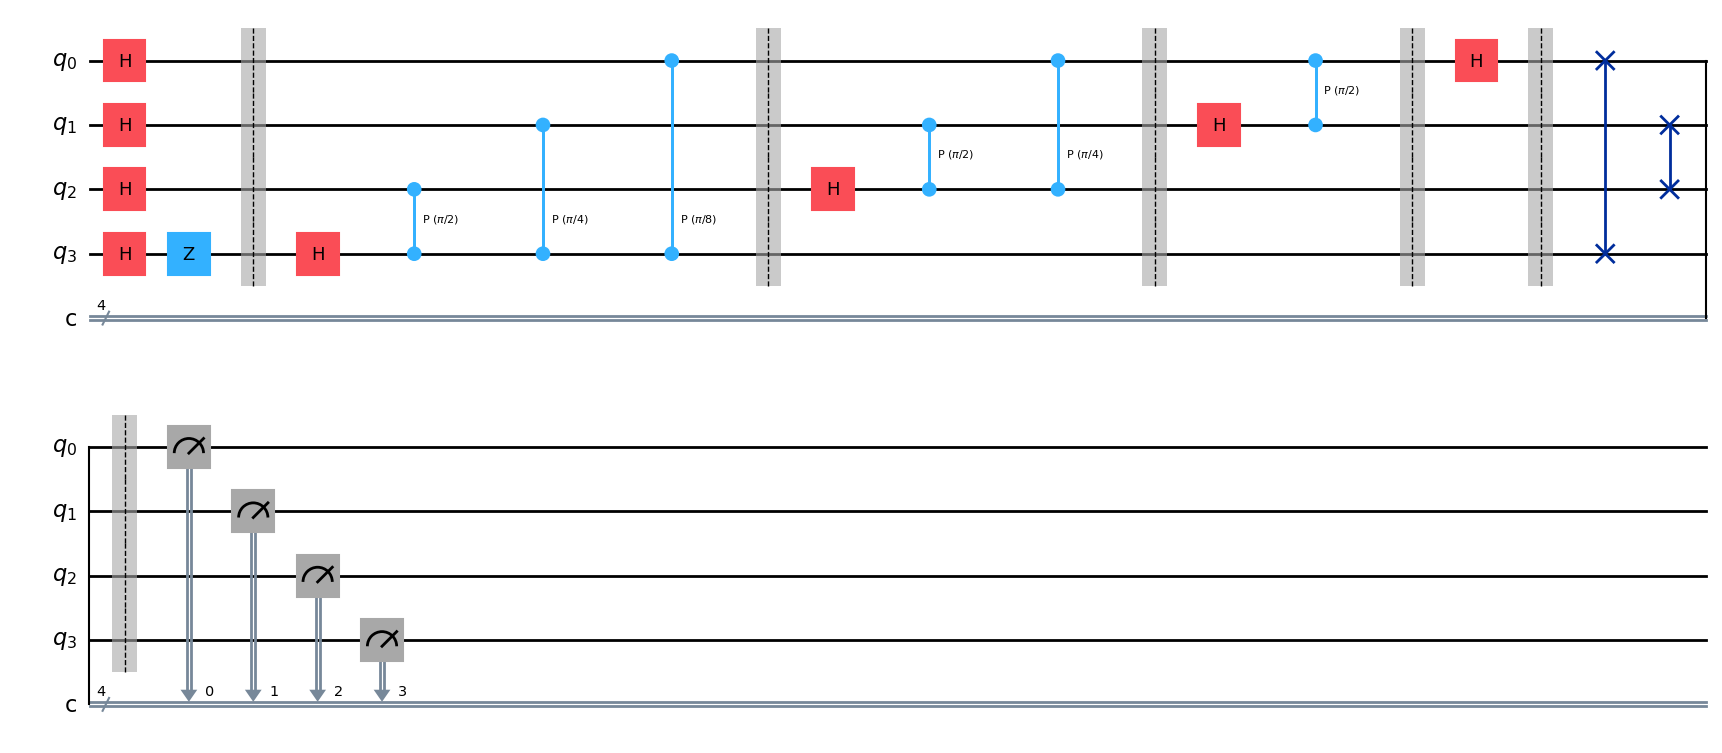

In [2]:
nqubit = 4
circuit = QuantumCircuit(nqubit,nqubit)
for i in range (nqubit):
    circuit.h(i)
circuit.z(3)
circuit.barrier()

circuit.h(nqubit-1)
circuit.cp(np.pi/2,2,3)
circuit.cp(np.pi/4,1,3)
circuit.cp(np.pi/8,0,3)
circuit.barrier()

circuit.h(nqubit-2)
circuit.cp(np.pi/2,1,2)
circuit.cp(np.pi/4,0,2)
circuit.barrier()

circuit.h(nqubit-3)
circuit.cp(np.pi/2,0,1)
circuit.barrier()

circuit.h(nqubit-4)
circuit.barrier()

circuit.swap(0,3)
circuit.swap(1,2)
  
circuit.barrier()
for i in range(nqubit):
    circuit.measure(i,i)
circuit.draw(output='mpl',style='iqp')

{'1101': 60, '1111': 396, '1001': 15, '0001': 418, '1011': 28, '0011': 49, '0111': 15, '0101': 19}


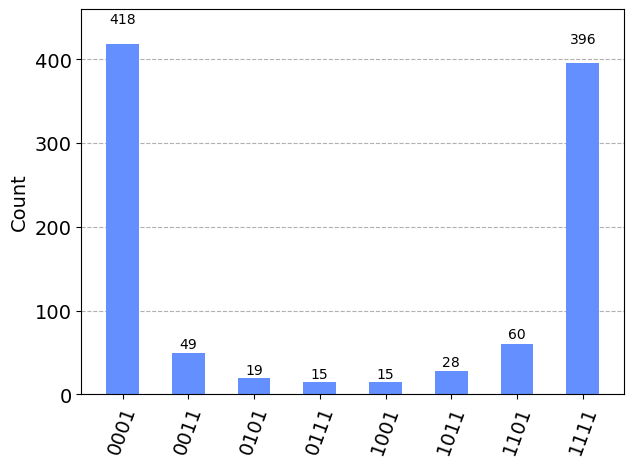

In [3]:
simulator = Aer.get_backend("qasm_simulator")
sim_result = execute(circuit,backend=simulator,shots=1000).result()
result = sim_result.get_counts()
print(result)
plot_histogram(result)

In [4]:
IBMQ.load_account()

C:\Users\shahram\AppData\Local\Temp\ipykernel_11268\485379158.py:1: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  IBMQ.load_account()
C:\Users\shahram\AppData\Local\Temp\ipykernel_11268\485379158.py:1: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.load_account()


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [5]:
provider = IBMQ.get_provider('ibm-q')

In [6]:
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_sherbrooke') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_brisbane') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_kyoto') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_osaka') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [7]:
qcom = provider.get_backend('ibm_brisbane')
job = execute(circuit,backend=qcom).result()
from qiskit.tools.monitor import job_monitor
#job_monitor(job)



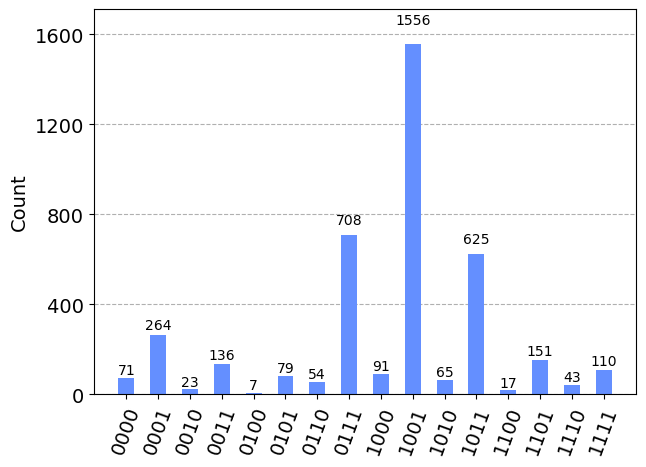

In [8]:
result1 = job.get_counts()
plot_histogram(result1)

In [9]:
from qiskit.ignis.mitigation.measurement import (complete_meas_cal,CompleteMeasFitter)

C:\Users\shahram\AppData\Local\Temp\ipykernel_11268\1464280974.py:1: DeprecationWarning: The qiskit.ignis package is deprecated and has been supersceded by the qiskit-experiments project. Refer to the migration guide: https://github.com/Qiskit/qiskit-ignis#migration-guide on how to migrate to the new project.
  from qiskit.ignis.mitigation.measurement import (complete_meas_cal,CompleteMeasFitter)


In [10]:
cal_circuits, state_labels = complete_meas_cal(qr = circuit.qregs[0], circlabel="measerrormitigation")

D:\Users\shahram\anaconda2\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


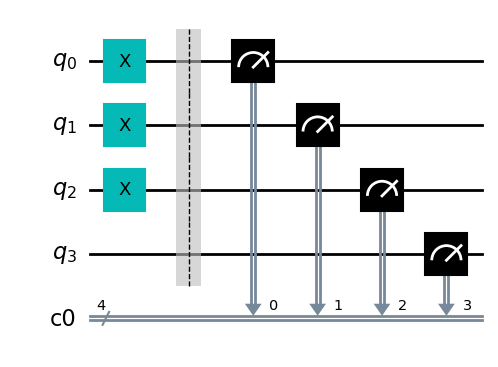

In [11]:
cal_circuits[7].draw(output="mpl")

In [12]:
len(cal_circuits)

16

In [13]:
device = provider.get_backend('ibm_brisbane')
cal_job = execute(cal_circuits,backend=device,shots=1024,optimization_level=0)
print(cal_job.job_id())


crgvmm2rmyzg00875qx0


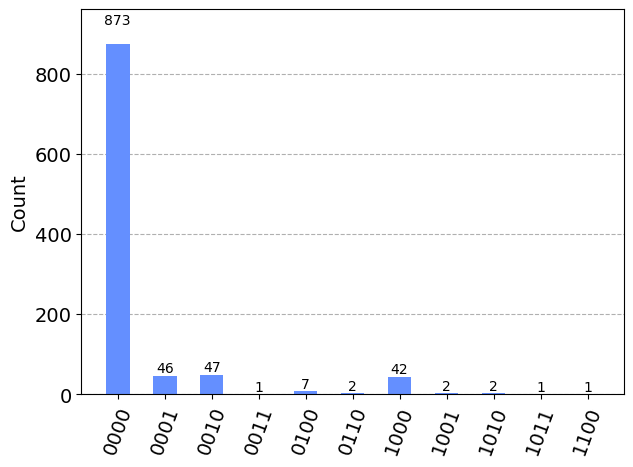

In [14]:
cal_result = cal_job.result()
plot_histogram(cal_result.get_counts(cal_circuits[0]))

In [15]:
meas_fitter = CompleteMeasFitter(cal_result, state_labels)

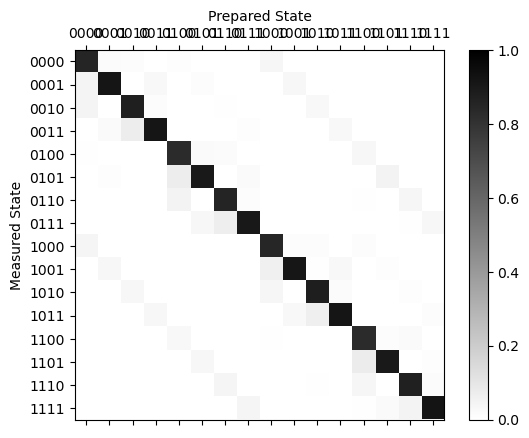

In [16]:
meas_fitter.plot_calibration()

In [17]:
meas_filter = meas_fitter.filter
mitigated_result = meas_filter.apply(result1)


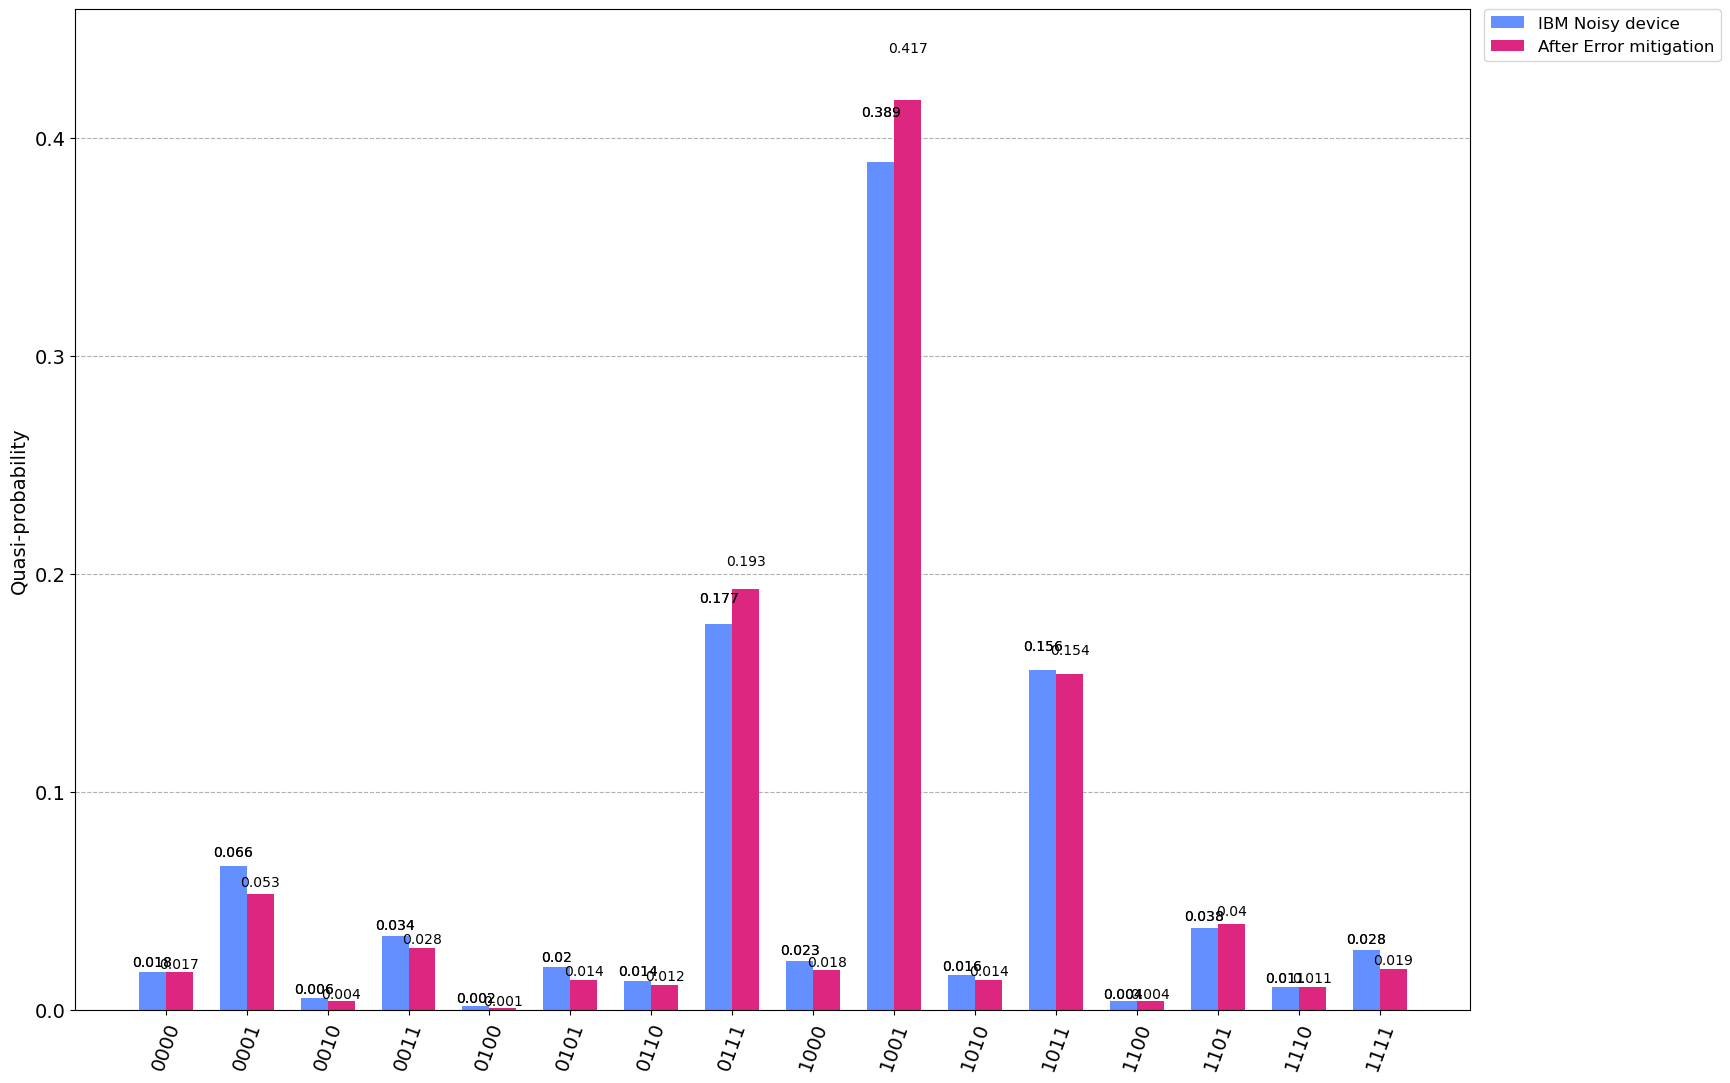

In [18]:
#print(mitigated_result.get_)
#device_counts = result1.get_counts(circuit)
#mitigated_counts = mitigated_result.get_counts(circuit)
plot_histogram([result1,mitigated_result], legend=["IBM Noisy device","After Error mitigation"], figsize=(18, 13))

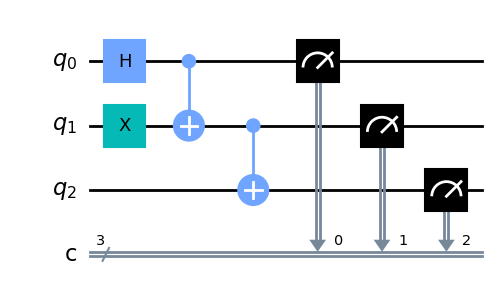

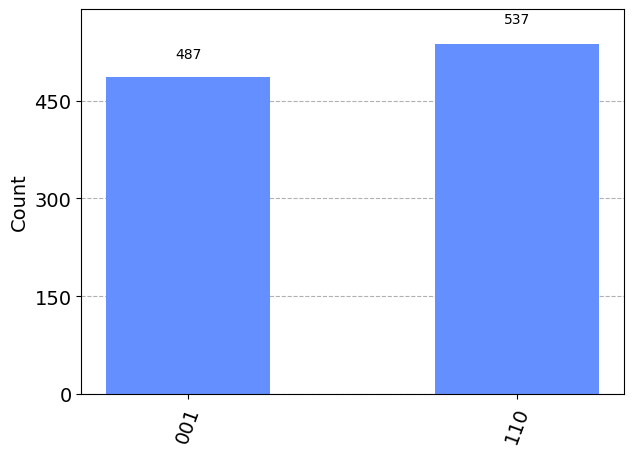

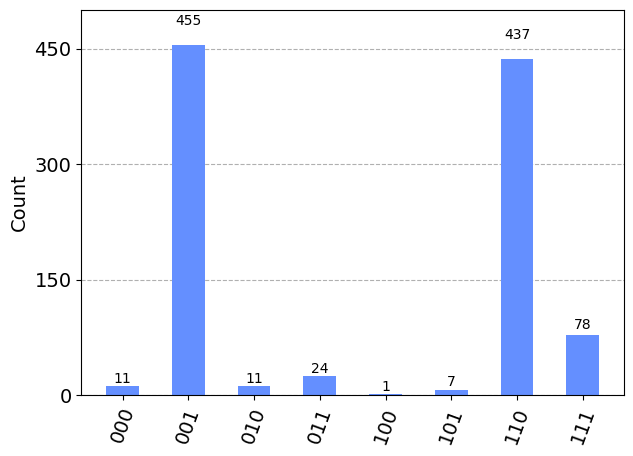